In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

**Task (1) – Domain Understanding: Classification or Regression**

**1.a)**

In [2]:
df = pd.read_csv('Raw_Males_VF_Dataset_Coursework1.csv')
df

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,NaN,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,NaN,-0.59
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59
3,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50
4,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,B2870,M,69,41,184.0,130.23,125,94,123.0,44,16,0.0,NaN,NaN,14.82
2860,B2871,M,63,32,189.0,110.83,107,94,108.0,46,6,0.0,NaN,NaN,14.91
2861,B2872,M,61,35,180.0,110.32,114,89,130.0,41,5,0.0,NaN,NaN,15.19
2862,B2873,M,75,48,189.0,159.52,127,116,159.0,25,3,0.0,NaN,NaN,16.05


In [3]:
#Checking the column names
df.columns

Index(['SUBJECT_ID', 'SEX', 'AGE_years', 'BMI ', 'HEIGHT_cm', 'WEIGHT_kg',
       'WAIST_CIRCUMFERENCE_cm', 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
       'SYSTOLIC_BLOOD_PRESSURE_mmHg', 'WALK_DURATION_PER_DAY_MINUTES',
       'COMPUTER_USE_TIME_PER_DAY_HOURS', 'SMOKING_STATUS ',
       'DISCONTINUED_NO_', 'CIGARETTES_CONSUMED_PER_DAY',
       'Visceral_Fat_Volume_Litres'],
      dtype='object')

In [4]:
#Removing the spaces from the dataset
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['SUBJECT_ID', 'SEX', 'AGE_years', 'BMI', 'HEIGHT_cm', 'WEIGHT_kg',
       'WAIST_CIRCUMFERENCE_cm', 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
       'SYSTOLIC_BLOOD_PRESSURE_mmHg', 'WALK_DURATION_PER_DAY_MINUTES',
       'COMPUTER_USE_TIME_PER_DAY_HOURS', 'SMOKING_STATUS', 'DISCONTINUED_NO_',
       'CIGARETTES_CONSUMED_PER_DAY', 'Visceral_Fat_Volume_Litres'],
      dtype='object')

In [5]:
#Target column check
df[df["Visceral_Fat_Volume_Litres"]<0].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                            'WALK_DURATION_PER_DAY_MINUTES',
                                                                            'COMPUTER_USE_TIME_PER_DAY_HOURS',
                                                                            'DISCONTINUED_NO_'
                                                                        ], axis=1)

,SUBJECT_ID,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,0.0,NaN,-0.76
1,B0012,0.0,NaN,-0.59


In [6]:
#Dropping the negative ones with null values, as the visceral fat volume cannot be negative
df = df[df["Visceral_Fat_Volume_Litres"]>0]
df[df["Visceral_Fat_Volume_Litres"]<0].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                            'WALK_DURATION_PER_DAY_MINUTES',
                                                                            'COMPUTER_USE_TIME_PER_DAY_HOURS',
                                                                            'DISCONTINUED_NO_'
                                                                        ], axis=1)

,SUBJECT_ID,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres


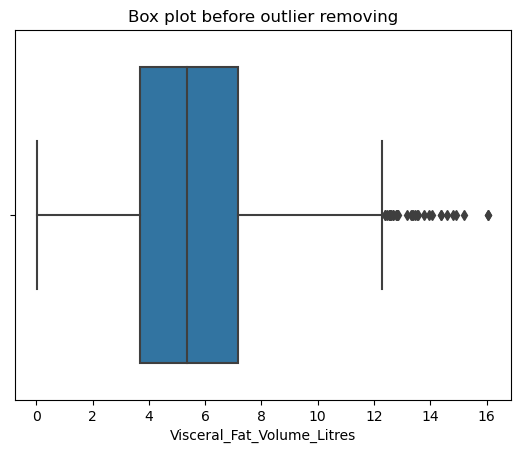

Old Shape:  (2862, 15)
New Shape:  (2821, 15)


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_21801/891049041.py:15: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Visceral_Fat_Volume_Litres'], 25,
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_21801/891049041.py:18: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Visceral_Fat_Volume_Litres'], 75,


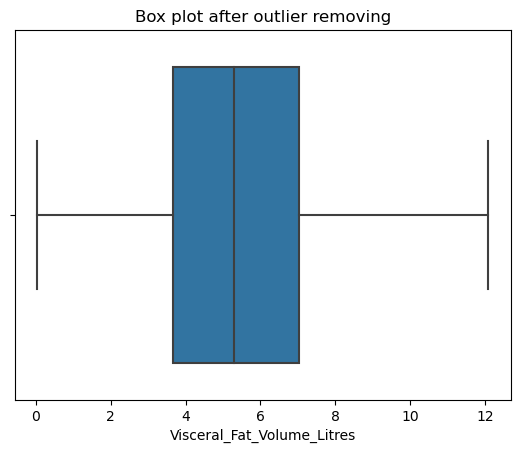

In [7]:
#Outlier check in the Visceral_Fat_Volume_Litres column
df = df.reset_index(drop=True)
sns.boxplot(x = df['Visceral_Fat_Volume_Litres'])
plt.title('Box plot before outlier removing')
plt.show()

old_shape = 0
new_shape = 1

print("Old Shape: ", df.shape)

while old_shape != new_shape:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df['Visceral_Fat_Volume_Litres'], 25, 
                       interpolation = 'midpoint') 

    Q3 = np.percentile(df['Visceral_Fat_Volume_Litres'], 75,
                       interpolation = 'midpoint') 
    IQR = Q3 - Q1 

    old_shape = df.shape
     

    # Upper bound
    df = df[df['Visceral_Fat_Volume_Litres'] < (Q3+1.5*IQR)]
    # Lower bound
    df = df[df['Visceral_Fat_Volume_Litres'] > (Q1-1.5*IQR)]

    new_shape = df.shape

print("New Shape: ", new_shape)

df = df.reset_index(drop=True)
sns.boxplot(x = df['Visceral_Fat_Volume_Litres'])
plt.title('Box plot after outlier removing')
plt.show()

In [8]:
#Checking the max value for target column
df["Visceral_Fat_Volume_Litres"].max()

12.09

In [9]:
#Setting and appliying the formula to classfiy the target column
def conditions(s):
    if (s['Visceral_Fat_Volume_Litres'] == None):
        return None
    elif (s['Visceral_Fat_Volume_Litres'] <= 3):
        return "Low Risk"
    elif (s['Visceral_Fat_Volume_Litres'] <= 6):
        return "Moderate Risk"
    else:
        return "High Risk"
df['Risk_Level'] = df.apply(conditions, axis=1)
df.head(10)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
0,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59,Low Risk
1,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50,Low Risk
2,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39,Low Risk
3,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,NaN,0.27,Low Risk
4,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,NaN,0.24,Low Risk
5,B0018,M,54,24,192.0,81.79,87,81,123.0,38,10,0.0,NaN,NaN,0.23,Low Risk
6,B0019,M,49,23,189.0,74.41,80,95,136.0,44,3,0.0,NaN,NaN,0.22,Low Risk
7,B0020,M,57,26,188.0,84.00,91,82,109.0,61,0,0.0,NaN,NaN,0.18,Low Risk
8,B0021,M,61,23,180.0,71.71,85,78,112.0,175,5,0.0,NaN,NaN,0.14,Low Risk
9,B0022,M,52,24,186.0,75.94,81,103,138.0,43,5,0.0,GFTY,NaN,0.07,Low Risk


In [10]:
#Checking the classification column of the target column
print("Low Risk Max: ", df[df['Risk_Level'] == "Low Risk"].Visceral_Fat_Volume_Litres.max())
print("Low Risk Min: ", df[df['Risk_Level'] == "Low Risk"].Visceral_Fat_Volume_Litres.min())
print("Moderate Risk Max: ", df[df['Risk_Level'] == "Moderate Risk"].Visceral_Fat_Volume_Litres.max())
print("Moderate Risk Min: ", df[df['Risk_Level'] == "Moderate Risk"].Visceral_Fat_Volume_Litres.min())
print("High Risk Max: ", df[df['Risk_Level'] == "High Risk"].Visceral_Fat_Volume_Litres.max())
print("High Risk Min: ", df[df['Risk_Level'] == "High Risk"].Visceral_Fat_Volume_Litres.min())

Low Risk Max:  2.99
Low Risk Min:  0.04
Moderate Risk Max:  6.0
Moderate Risk Min:  3.01
High Risk Max:  12.09
High Risk Min:  6.01


In [11]:
#Checking the null values and measurement scale types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SUBJECT_ID                       2821 non-null   object 
 1   SEX                              2821 non-null   object 
 2   AGE_years                        2821 non-null   int64  
 3   BMI                              2821 non-null   int64  
 4   HEIGHT_cm                        2821 non-null   float64
 5   WEIGHT_kg                        2821 non-null   float64
 6   WAIST_CIRCUMFERENCE_cm           2821 non-null   int64  
 7   DIASTOLIC_BLOOD_PRESSURE_mmHg    2821 non-null   int64  
 8   SYSTOLIC_BLOOD_PRESSURE_mmHg     2817 non-null   float64
 9   WALK_DURATION_PER_DAY_MINUTES    2821 non-null   int64  
 10  COMPUTER_USE_TIME_PER_DAY_HOURS  2821 non-null   int64  
 11  SMOKING_STATUS                   2819 non-null   float64
 12  DISCONTINUED_NO_    

In [12]:
#Producing the statistical description of df
df.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2817.000000,2821.000000,2821.000000,2819.000000,126.000000,2821.000000
mean,62.327189,29.151365,182.901453,90.858614,98.736264,91.545551,133.747959,81.771358,4.509039,0.040085,23.444444,5.446306
std,8.520792,3.706347,8.701322,13.011089,9.771789,10.592741,16.737795,64.301588,4.426268,0.196194,13.404212,2.467363
min,41.000000,20.000000,1.700000,55.410000,70.000000,48.000000,90.000000,1.000000,0.000000,0.000000,2.000000,0.040000
25%,57.000000,27.000000,178.000000,81.770000,92.000000,84.000000,122.000000,47.000000,2.000000,0.000000,12.000000,3.660000
50%,63.000000,29.000000,183.000000,89.520000,98.000000,91.000000,132.000000,67.000000,3.000000,0.000000,21.500000,5.300000
75%,69.000000,31.000000,188.000000,98.110000,104.000000,98.000000,144.000000,92.000000,6.000000,0.000000,34.000000,7.040000
max,190.000000,51.000000,210.000000,162.940000,153.000000,130.000000,192.000000,656.000000,69.000000,1.000000,50.000000,12.090000


In [13]:
#Checking the age column
df[df.AGE_years > 100]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
1304,B1317,M,190,32,161.0,78.56,104,82,135.0,57,3,0.0,NaN,NaN,5.09,Moderate Risk


In [14]:
#Replacing the 190 years old with null values, as it is impossible
df['AGE_years'] = df['AGE_years'].replace([190], None)
df = df[df.AGE_years < 100]
df[df.AGE_years > 100]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level


In [15]:
#Checking the age column's range
print("Age Max: ", df.AGE_years.max())
print("Age Min: ", df.AGE_years.min())

Age Max:  80
Age Min:  41


In [16]:
#Checking the height column
df[df.HEIGHT_cm < 50]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
1,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50,Low Risk
2,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39,Low Risk


In [17]:
#Dropping the misentered height data by prediction
df = df[df.HEIGHT_cm > 50]
df[df.HEIGHT_cm < 50]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level


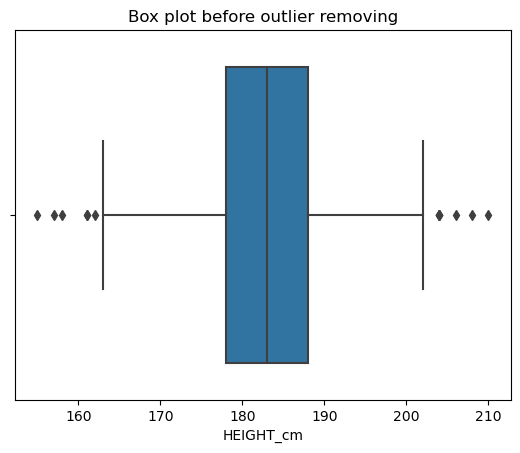

Old Shape:  (2818, 16)
New Shape:  (2804, 16)


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_21801/2269151447.py:15: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HEIGHT_cm'], 25,
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_21801/2269151447.py:18: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HEIGHT_cm'], 75,


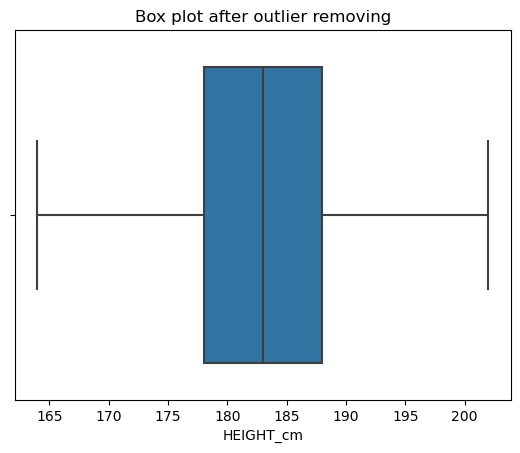

In [18]:
#Outlier check in the HEIGHT_cm column
df = df.reset_index(drop=True)
sns.boxplot(x = df['HEIGHT_cm'])
plt.title('Box plot before outlier removing')
plt.show()

old_shape = 0
new_shape = 1

print("Old Shape: ", df.shape)

while old_shape != new_shape:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df['HEIGHT_cm'], 25, 
                       interpolation = 'midpoint') 

    Q3 = np.percentile(df['HEIGHT_cm'], 75,
                       interpolation = 'midpoint') 
    IQR = Q3 - Q1 

    old_shape = df.shape
     

    # Upper bound
    df = df[df['HEIGHT_cm'] < (Q3+1.5*IQR)]
    # Lower bound
    df = df[df['HEIGHT_cm'] > (Q1-1.5*IQR)]

    new_shape = df.shape

print("New Shape: ", new_shape)

df = df.reset_index(drop=True)
sns.boxplot(x = df['HEIGHT_cm'])
plt.title('Box plot after outlier removing')
plt.show()

In [19]:
#Checking the statistics
df.describe()

,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,2804.00000,2804.000000,2804.000000,2804.000000,2804.00000,2800.000000,2804.000000,2804.000000,2802.000000,126.000000,2804.000000
mean,29.14515,183.039765,90.849815,98.730742,91.56669,133.768571,81.703994,4.500000,0.040328,23.444444,5.437817
std,3.70380,7.062372,12.917661,9.745490,10.57158,16.719766,64.127327,4.423004,0.196763,13.404212,2.456753
min,20.00000,164.000000,55.410000,70.000000,48.00000,90.000000,1.000000,0.000000,0.000000,2.000000,0.040000
25%,27.00000,178.000000,81.807500,92.000000,84.00000,122.000000,47.000000,2.000000,0.000000,12.000000,3.650000
50%,29.00000,183.000000,89.525000,98.000000,91.00000,132.000000,67.000000,3.000000,0.000000,21.500000,5.290000
75%,31.00000,188.000000,98.080000,104.000000,98.00000,144.000000,92.000000,6.000000,0.000000,34.000000,7.030000
max,51.00000,202.000000,162.940000,153.000000,130.00000,192.000000,656.000000,69.000000,1.000000,50.000000,12.090000


In [20]:
#Checking the SYSTOLIC_BLOOD_PRESSURE_mmHg variable
df[df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].isnull()].drop(['DIASTOLIC_BLOOD_PRESSURE_mmHg'], axis=1)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
123,B0138,M,63,26,182.0,82.65,95,NaN,65,0,0.0,NaN,NaN,1.34,Low Risk
1078,B1095,M,62,28,185.0,91.19,97,NaN,77,4,0.0,NaN,NaN,4.57,Moderate Risk
2280,B2302,M,77,31,181.0,90.32,98,NaN,31,9,0.0,NaN,NaN,7.66,High Risk
2718,B2745,M,57,29,181.0,89.24,98,NaN,97,0,0.0,NaN,NaN,10.36,High Risk


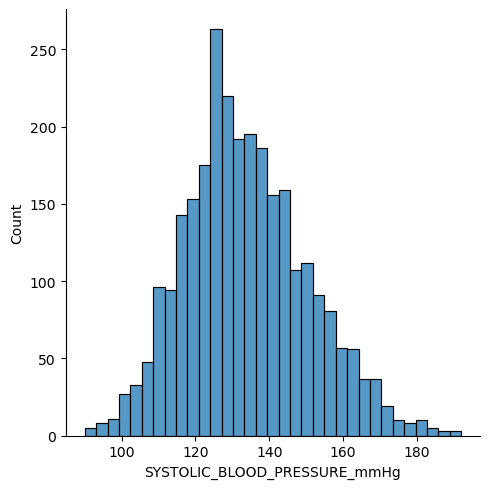

In [21]:
#Checking the distribution
sns.displot(df, x="SYSTOLIC_BLOOD_PRESSURE_mmHg")

In [22]:
#Filling the missing records with the mean for systolic blood pressure variable
df['SYSTOLIC_BLOOD_PRESSURE_mmHg'] = df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].fillna(df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SUBJECT_ID                       2804 non-null   object 
 1   SEX                              2804 non-null   object 
 2   AGE_years                        2804 non-null   object 
 3   BMI                              2804 non-null   int64  
 4   HEIGHT_cm                        2804 non-null   float64
 5   WEIGHT_kg                        2804 non-null   float64
 6   WAIST_CIRCUMFERENCE_cm           2804 non-null   int64  
 7   DIASTOLIC_BLOOD_PRESSURE_mmHg    2804 non-null   int64  
 8   SYSTOLIC_BLOOD_PRESSURE_mmHg     2804 non-null   float64
 9   WALK_DURATION_PER_DAY_MINUTES    2804 non-null   int64  
 10  COMPUTER_USE_TIME_PER_DAY_HOURS  2804 non-null   int64  
 11  SMOKING_STATUS                   2802 non-null   float64
 12  DISCONTINUED_NO_    

In [23]:
#Checking the SYSTOLIC_BLOOD_PRESSURE_mmHg variable
df[df['SUBJECT_ID'].isin(['B0138','B1095','B2302','B2745','B2844'])].drop(['DIASTOLIC_BLOOD_PRESSURE_mmHg'], axis=1)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
123,B0138,M,63,26,182.0,82.65,95,133.768571,65,0,0.0,NaN,NaN,1.34,Low Risk
1078,B1095,M,62,28,185.0,91.19,97,133.768571,77,4,0.0,NaN,NaN,4.57,Moderate Risk
2280,B2302,M,77,31,181.0,90.32,98,133.768571,31,9,0.0,NaN,NaN,7.66,High Risk
2718,B2745,M,57,29,181.0,89.24,98,133.768571,97,0,0.0,NaN,NaN,10.36,High Risk


In [24]:
#Checking the computer use time column
df[df.COMPUTER_USE_TIME_PER_DAY_HOURS > 24].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        ], axis=1)

,SUBJECT_ID,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
313,B0328,65,30,0.0,NaN,NaN,2.50,Low Risk
322,B0337,67,32,0.0,NaN,NaN,2.53,Low Risk
710,B0726,48,27,0.0,NaN,NaN,3.68,Moderate Risk
1120,B1137,61,30,0.0,NaN,11.0,4.69,Moderate Risk
1174,B1191,102,69,0.0,NaN,NaN,4.81,Moderate Risk
1243,B1260,86,35,0.0,NaN,NaN,4.98,Moderate Risk
1330,B1349,91,25,0.0,NaN,NaN,5.15,Moderate Risk
1578,B1598,68,46,0.0,NaN,NaN,5.76,Moderate Risk
2315,B2337,80,32,0.0,NaN,NaN,7.79,High Risk
2593,B2617,11,25,0.0,NaN,NaN,9.18,High Risk


In [25]:
#Replacing the computer use time with null
df = df[df.COMPUTER_USE_TIME_PER_DAY_HOURS <= 24]
df[df.COMPUTER_USE_TIME_PER_DAY_HOURS > 24].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        ], axis=1)


,SUBJECT_ID,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level


In [26]:
df[df.SUBJECT_ID.isin(["B0328","B0337","B0726","B0817","B0892","B1078","B1137","B1191","B1260","B1349","B1598","B2223"
                       ,"B2337","B2617","B2625","B2631","B2819"])].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        ], axis=1)


,SUBJECT_ID,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
801,B0817,80,24,0.0,NaN,NaN,3.92,Moderate Risk
875,B0892,52,24,0.0,NaN,NaN,4.08,Moderate Risk
1061,B1078,104,24,0.0,NaN,NaN,4.54,Moderate Risk
2201,B2223,62,24,0.0,NaN,NaN,7.37,High Risk
2601,B2625,49,24,0.0,NaN,NaN,9.23,High Risk


In [27]:
#Sanity check for smoking
df[(df['CIGARETTES_CONSUMED_PER_DAY']>0) & (df['SMOKING_STATUS']!=1)].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                            'WALK_DURATION_PER_DAY_MINUTES',
                                                                            'COMPUTER_USE_TIME_PER_DAY_HOURS',
                                                                            'DISCONTINUED_NO_'
                                                                        ], axis=1)


,SUBJECT_ID,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
243,B0258,NaN,8.0,2.18,Low Risk
436,B0452,NaN,2.0,2.93,Low Risk
471,B0487,0.0,17.0,3.04,Moderate Risk
538,B0554,0.0,9.0,3.26,Moderate Risk
711,B0727,0.0,13.0,3.68,Moderate Risk
1165,B1182,0.0,12.0,4.79,Moderate Risk
1172,B1189,0.0,8.0,4.81,Moderate Risk
1179,B1196,0.0,45.0,4.82,Moderate Risk
1502,B1522,0.0,13.0,5.56,Moderate Risk
1791,B1812,0.0,5.0,6.26,High Risk


In [28]:
df[(df['CIGARETTES_CONSUMED_PER_DAY']!=0) & (df['CIGARETTES_CONSUMED_PER_DAY']!=1)].drop(['SEX','AGE_years','BMI',
                                                                                          'HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                            'WALK_DURATION_PER_DAY_MINUTES',
                                                                            'COMPUTER_USE_TIME_PER_DAY_HOURS',
                                                                            'DISCONTINUED_NO_'
                                                                        ], axis=1)

,SUBJECT_ID,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
0,B0013,0.0,NaN,0.59,Low Risk
1,B0016,0.0,NaN,0.27,Low Risk
2,B0017,0.0,NaN,0.24,Low Risk
3,B0018,0.0,NaN,0.23,Low Risk
4,B0019,0.0,NaN,0.22,Low Risk
...,...,...,...,...,...
2799,B2828,0.0,NaN,11.88,High Risk
2800,B2830,0.0,NaN,11.92,High Risk
2801,B2831,0.0,NaN,11.99,High Risk
2802,B2832,0.0,NaN,12.00,High Risk


In [29]:
#Setting and appliying the formula to fill the smoking status with 1 for cigarettes consumers
def smoker_conditions(s):
    if (s['CIGARETTES_CONSUMED_PER_DAY'] > 0):
        return 1
    else:
        return s['SMOKING_STATUS']
df['SMOKING_STATUS'] = df.apply(smoker_conditions, axis=1)

In [30]:
#Setting and appliying the formula to fill the smoke consumption with 0 for nonsmokers
def nonsmoker_conditions(s):
    if (s['SMOKING_STATUS'] == 0):
        return 0
    else:
        return s['CIGARETTES_CONSUMED_PER_DAY']
df['CIGARETTES_CONSUMED_PER_DAY'] = df.apply(nonsmoker_conditions, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2803
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SUBJECT_ID                       2792 non-null   object 
 1   SEX                              2792 non-null   object 
 2   AGE_years                        2792 non-null   object 
 3   BMI                              2792 non-null   int64  
 4   HEIGHT_cm                        2792 non-null   float64
 5   WEIGHT_kg                        2792 non-null   float64
 6   WAIST_CIRCUMFERENCE_cm           2792 non-null   int64  
 7   DIASTOLIC_BLOOD_PRESSURE_mmHg    2792 non-null   int64  
 8   SYSTOLIC_BLOOD_PRESSURE_mmHg     2792 non-null   float64
 9   WALK_DURATION_PER_DAY_MINUTES    2792 non-null   int64  
 10  COMPUTER_USE_TIME_PER_DAY_HOURS  2792 non-null   int64  
 11  SMOKING_STATUS                   2792 non-null   float64
 12  DISCONTINUED_NO_    

In [31]:
df[df.SUBJECT_ID.isin(['B0258','B0452','B0487','B0554','B0727','B1137','B1182','B1189','B1196','B1522','B1812','B2375','B2553'])].drop(['SEX','AGE_years','BMI','HEIGHT_cm',
                                                                         'WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                            'WALK_DURATION_PER_DAY_MINUTES',
                                                                            'COMPUTER_USE_TIME_PER_DAY_HOURS',
                                                                            'DISCONTINUED_NO_'
                                                                        ], axis=1)


,SUBJECT_ID,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
243,B0258,1.0,8.0,2.18,Low Risk
436,B0452,1.0,2.0,2.93,Low Risk
471,B0487,1.0,17.0,3.04,Moderate Risk
538,B0554,1.0,9.0,3.26,Moderate Risk
711,B0727,1.0,13.0,3.68,Moderate Risk
1165,B1182,1.0,12.0,4.79,Moderate Risk
1172,B1189,1.0,8.0,4.81,Moderate Risk
1179,B1196,1.0,45.0,4.82,Moderate Risk
1502,B1522,1.0,13.0,5.56,Moderate Risk
1791,B1812,1.0,5.0,6.26,High Risk


In [32]:
df.drop(['SEX','AGE_years','BMI','HEIGHT_cm','WEIGHT_kg','WAIST_CIRCUMFERENCE_cm',
                                                                        'DIASTOLIC_BLOOD_PRESSURE_mmHg',
                                                                        'SYSTOLIC_BLOOD_PRESSURE_mmHg',
                                                                            'WALK_DURATION_PER_DAY_MINUTES',
                                                                            'COMPUTER_USE_TIME_PER_DAY_HOURS',
                                                                            'DISCONTINUED_NO_'
                                                                        ], axis=1)

,SUBJECT_ID,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level
0,B0013,0.0,0.0,0.59,Low Risk
1,B0016,0.0,0.0,0.27,Low Risk
2,B0017,0.0,0.0,0.24,Low Risk
3,B0018,0.0,0.0,0.23,Low Risk
4,B0019,0.0,0.0,0.22,Low Risk
...,...,...,...,...,...
2799,B2828,0.0,0.0,11.88,High Risk
2800,B2830,0.0,0.0,11.92,High Risk
2801,B2831,0.0,0.0,11.99,High Risk
2802,B2832,0.0,0.0,12.00,High Risk


In [33]:
#Checking the null values a
df[(df['SMOKING_STATUS']!=1) & (df['SMOKING_STATUS']!=0)]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level


In [34]:
#Sanity check for smoking
df[(df['SMOKING_STATUS']==0) & (df['CIGARETTES_CONSUMED_PER_DAY']>0)]

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres,Risk_Level


In [35]:
#duplicate check
df = df.drop_duplicates()

**Task (2) – Data Understanding: Producing Your Experimental Designing**

**2.a)**

In [36]:
#Checking the columns
df = df.drop(columns=['DISCONTINUED_NO_','Visceral_Fat_Volume_Litres','SUBJECT_ID','SEX'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2803
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE_years                        2792 non-null   object 
 1   BMI                              2792 non-null   int64  
 2   HEIGHT_cm                        2792 non-null   float64
 3   WEIGHT_kg                        2792 non-null   float64
 4   WAIST_CIRCUMFERENCE_cm           2792 non-null   int64  
 5   DIASTOLIC_BLOOD_PRESSURE_mmHg    2792 non-null   int64  
 6   SYSTOLIC_BLOOD_PRESSURE_mmHg     2792 non-null   float64
 7   WALK_DURATION_PER_DAY_MINUTES    2792 non-null   int64  
 8   COMPUTER_USE_TIME_PER_DAY_HOURS  2792 non-null   int64  
 9   SMOKING_STATUS                   2792 non-null   float64
 10  CIGARETTES_CONSUMED_PER_DAY      2792 non-null   float64
 11  Risk_Level                       2792 non-null   object 
dtypes: float64(5), int64

In [37]:
df.head(10)

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Risk_Level
0,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.0,Low Risk
1,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0.0,Low Risk
2,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0.0,Low Risk
3,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0.0,Low Risk
4,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0.0,Low Risk
5,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0.0,Low Risk
6,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0.0,Low Risk
7,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0.0,Low Risk
8,54,27,177.0,75.32,91,102,144.0,78,0,0.0,0.0,Low Risk
9,53,24,188.0,82.55,87,78,123.0,46,2,0.0,0.0,Low Risk


In [38]:
df.describe()

,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000
mean,29.146848,183.019341,90.843521,98.729226,91.580587,133.809840,81.770415,4.374284,0.044771,1.054083
std,3.706531,7.052057,12.907480,9.737421,10.561313,16.673732,64.238788,3.916171,0.206837,5.630789
min,20.000000,164.000000,55.410000,70.000000,48.000000,90.000000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,178.000000,81.830000,92.000000,84.000000,122.000000,47.000000,2.000000,0.000000,0.000000
50%,29.000000,183.000000,89.525000,98.000000,91.000000,133.000000,67.000000,3.000000,0.000000,0.000000
75%,31.000000,188.000000,98.065000,104.000000,98.000000,144.000000,92.250000,6.000000,0.000000,0.000000
max,51.000000,202.000000,162.940000,153.000000,130.000000,192.000000,656.000000,24.000000,1.000000,50.000000


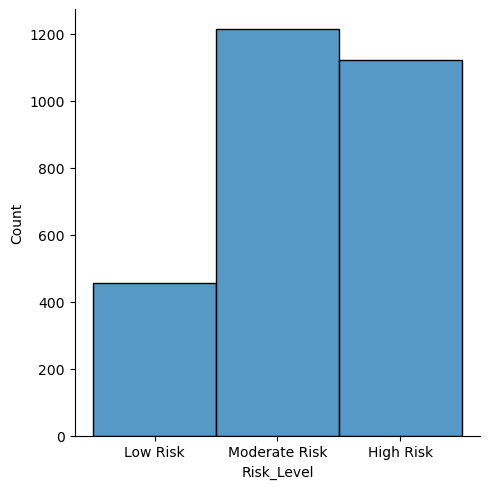

In [39]:
#Distribution of the target column's classes
import seaborn as sns
sns.displot(df, x="Risk_Level")

In [40]:
#Percentages of the target column's classes
df.Risk_Level.value_counts(normalize=True)

Moderate Risk    0.434456
High Risk        0.401862
Low Risk         0.163682
Name: Risk_Level, dtype: float64

Model

In [41]:
#check number of rows and columns in dataset
df.shape

(2792, 12)

In [42]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Risk_Level'])
#check that the target variable has been removed
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2803
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE_years                        2792 non-null   object 
 1   BMI                              2792 non-null   int64  
 2   HEIGHT_cm                        2792 non-null   float64
 3   WEIGHT_kg                        2792 non-null   float64
 4   WAIST_CIRCUMFERENCE_cm           2792 non-null   int64  
 5   DIASTOLIC_BLOOD_PRESSURE_mmHg    2792 non-null   int64  
 6   SYSTOLIC_BLOOD_PRESSURE_mmHg     2792 non-null   float64
 7   WALK_DURATION_PER_DAY_MINUTES    2792 non-null   int64  
 8   COMPUTER_USE_TIME_PER_DAY_HOURS  2792 non-null   int64  
 9   SMOKING_STATUS                   2792 non-null   float64
 10  CIGARETTES_CONSUMED_PER_DAY      2792 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 326.3+ KB


In [43]:
#separate target values
y = df['Risk_Level'].values
#view target values
y[0:5]


array(['Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk'],
      dtype=object)

**Task (4) – Modelling: Create Predictive Classification Models**

**b)**

In [44]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [45]:
X

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY
0,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.0
1,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0.0
2,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0.0
3,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0.0
4,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2799,65,33,168.0,84.35,97,97,149.0,115,3,0.0,0.0
2800,74,36,175.0,101.25,110,82,109.0,57,11,0.0,0.0
2801,73,32,187.0,108.45,110,89,113.0,63,7,0.0,0.0
2802,66,34,176.0,100.17,104,99,154.0,3,5,0.0,0.0


In [46]:
minmax_scale = MinMaxScaler()
X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.transform(X_test)
X_scaled = minmax_scale.transform(X)
pd.DataFrame(X_scaled)


,0,1,2,3,4,5,6,7,8,9,10
0,0.538462,0.258065,0.289474,0.255836,0.277108,0.853659,0.686275,0.085627,0.250000,0.0,0.0
1,0.743590,0.225806,0.421053,0.196782,0.301205,0.426829,0.362745,0.100917,0.208333,0.0,0.0
2,0.615385,0.032258,0.657895,0.074026,0.072289,0.548780,0.323529,0.126911,0.125000,0.0,0.0
3,0.333333,0.129032,0.736842,0.245327,0.204819,0.402439,0.323529,0.055046,0.416667,0.0,0.0
4,0.205128,0.096774,0.657895,0.176695,0.120482,0.573171,0.450980,0.064220,0.125000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2787,0.615385,0.419355,0.105263,0.269134,0.325301,0.597561,0.578431,0.172783,0.125000,0.0,0.0
2788,0.846154,0.516129,0.289474,0.426300,0.481928,0.414634,0.186275,0.084098,0.458333,0.0,0.0
2789,0.820513,0.387097,0.605263,0.493258,0.481928,0.500000,0.225490,0.093272,0.291667,0.0,0.0
2790,0.641026,0.451613,0.315789,0.416256,0.409639,0.621951,0.627451,0.001529,0.208333,0.0,0.0


In [47]:
std_scale = StandardScaler()
X_train_stdscaled = std_scale.fit_transform(X_train)
X_test_stdscaled = std_scale.transform(X_test)
X_stdscaled = std_scale.transform(X)

In [48]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.512821,0.354839,0.578947,0.396262,0.433735,0.646341,0.598039,0.061162,0.166667,0.0,0.0
1,0.743590,0.322581,0.736842,0.439691,0.506024,0.341463,0.568627,0.103976,0.291667,0.0,0.0
2,0.153846,0.225806,0.323684,0.243095,0.240964,0.719512,0.333333,0.058104,0.125000,0.0,0.0
3,0.615385,0.258065,0.526316,0.290524,0.204819,0.402439,0.196078,0.365443,0.250000,0.0,0.0
4,0.205128,0.483871,0.526316,0.525342,0.590361,0.573171,0.254902,0.027523,0.208333,0.0,0.0


In [49]:
pd.DataFrame(y_train).head()

,0
0,High Risk
1,High Risk
2,Moderate Risk
3,Low Risk
4,High Risk


In [50]:
# Create KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled, y_test)

0.5599284436493739

In [51]:
# Create Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
mnb.score(X_test_scaled, y_test)

0.518783542039356

In [52]:
# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb.score(X_test_scaled, y_test)

0.627906976744186

In [53]:
# Create Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train_scaled, y_train)
bnb.score(X_test_scaled, y_test)

0.4329159212880143

In [54]:
# Create Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train_scaled,y_train)
dtc.score(X_test_scaled, y_test)

0.5152057245080501

In [55]:
# Create Decision MLP classifier
mlp = MLPClassifier()
mlp = mlp.fit(X_train_scaled,y_train)
mlp.score(X_test_scaled, y_test)

0.6511627906976745

**Task (5) – Evaluation: How good are your models**

**5.a)**

Text(63.53777777777783, 0.5, 'Actual')

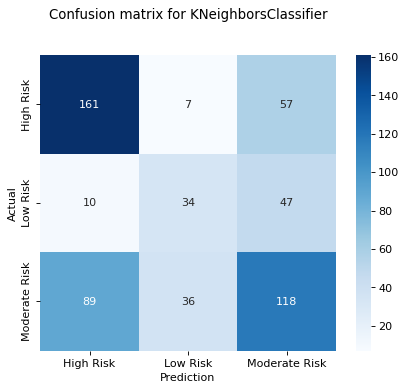

In [56]:
#Confusion matrix for KNeighborsClassifier
y_pred_knn = knn.predict(X_test_scaled)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(dpi=80)
sns.heatmap(knn_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
       xticklabels=["High Risk","Low Risk","Moderate Risk"],
       yticklabels=["High Risk","Low Risk","Moderate Risk"]);
plt.title('Confusion matrix for KNeighborsClassifier', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(63.53777777777783, 0.5, 'Actual')

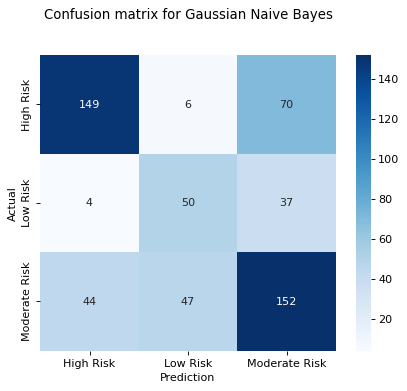

In [57]:
#Confusion matrix for Gaussian Naive Bayes
y_pred_gnb = gnb.predict(X_test_scaled)

from sklearn import metrics
gnb_matrix = metrics.confusion_matrix(y_test, y_pred_gnb)
plt.figure(dpi=80)
sns.heatmap(gnb_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
       xticklabels=["High Risk","Low Risk","Moderate Risk"],
       yticklabels=["High Risk","Low Risk","Moderate Risk"]);
plt.title('Confusion matrix for Gaussian Naive Bayes', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(63.53777777777783, 0.5, 'Actual')

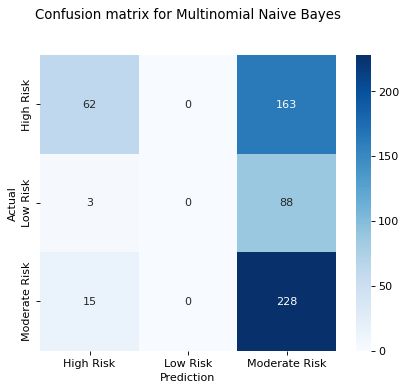

In [58]:
#Confusion matrix for Multinomial Naive Bayes
y_pred_mnb = mnb.predict(X_test_scaled)

from sklearn import metrics
gnb_matrix = metrics.confusion_matrix(y_test, y_pred_mnb)
plt.figure(dpi=80)
sns.heatmap(gnb_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
       xticklabels=["High Risk","Low Risk","Moderate Risk"],
       yticklabels=["High Risk","Low Risk","Moderate Risk"]);
plt.title('Confusion matrix for Multinomial Naive Bayes', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(63.53777777777783, 0.5, 'Actual')

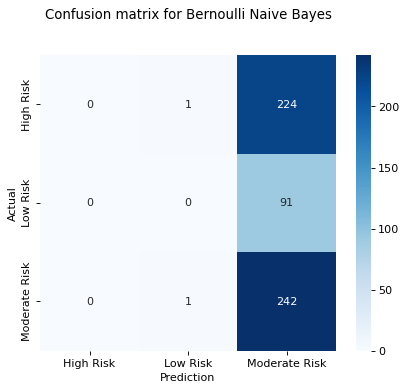

In [59]:
#Confusion matrix for Bernoulli Naive Bayes
y_pred_bnb = bnb.predict(X_test_scaled)

from sklearn import metrics
gnb_matrix = metrics.confusion_matrix(y_test, y_pred_bnb)
plt.figure(dpi=80)
sns.heatmap(gnb_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
       xticklabels=["High Risk","Low Risk","Moderate Risk"],
       yticklabels=["High Risk","Low Risk","Moderate Risk"]);
plt.title('Confusion matrix for Bernoulli Naive Bayes', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(63.53777777777783, 0.5, 'Actual')

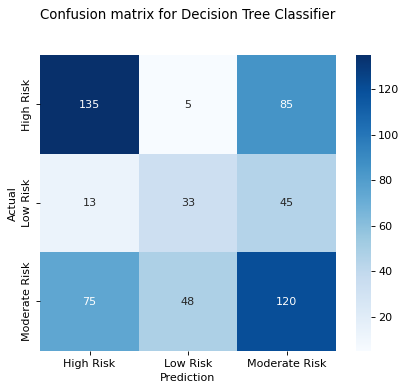

In [60]:
#Confusion matrix for Decision Tree Classifier
y_pred_dtc = dtc.predict(X_test_scaled)

from sklearn import metrics
dtc_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
plt.figure(dpi=80)
sns.heatmap(dtc_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
       xticklabels=["High Risk","Low Risk","Moderate Risk"],
       yticklabels=["High Risk","Low Risk","Moderate Risk"]);
plt.title('Confusion matrix for Decision Tree Classifier', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(63.53777777777783, 0.5, 'Actual')

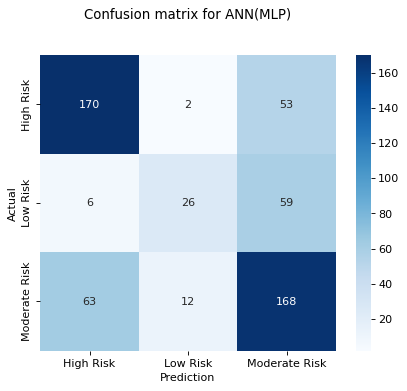

In [61]:
#Confusion matrix for ANN(MLP)
y_pred_mlp = mlp.predict(X_test_scaled)

from sklearn import metrics
dtc_matrix = metrics.confusion_matrix(y_test, y_pred_mlp)
plt.figure(dpi=80)
sns.heatmap(dtc_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
       xticklabels=["High Risk","Low Risk","Moderate Risk"],
       yticklabels=["High Risk","Low Risk","Moderate Risk"]);
plt.title('Confusion matrix for ANN(MLP)', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

**5.b)**

               precision    recall  f1-score   support

    High Risk       0.62      0.72      0.66       225
     Low Risk       0.44      0.37      0.40        91
Moderate Risk       0.53      0.49      0.51       243

     accuracy                           0.56       559
    macro avg       0.53      0.52      0.53       559
 weighted avg       0.55      0.56      0.55       559



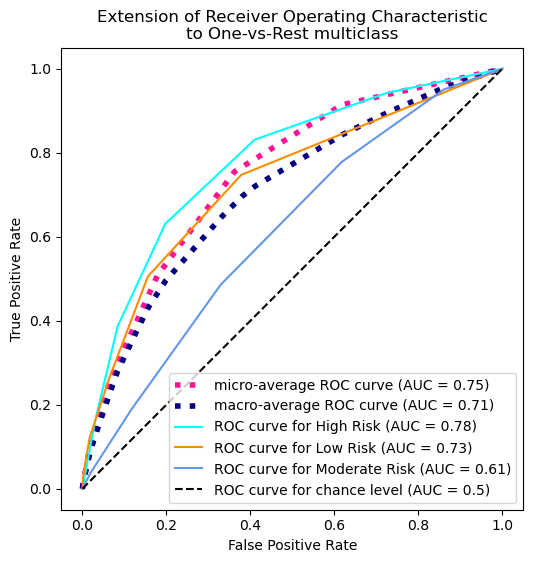

In [62]:
#KNN Scores
print(classification_report(y_test, y_pred_knn))

from sklearn.metrics import RocCurveDisplay
y_score = knn.predict_proba(X_test_scaled)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle
target_names = ['High Risk', 'Low Risk', 'Moderate Risk']

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


               precision    recall  f1-score   support

    High Risk       0.78      0.28      0.41       225
     Low Risk       0.00      0.00      0.00        91
Moderate Risk       0.48      0.94      0.63       243

     accuracy                           0.52       559
    macro avg       0.42      0.40      0.35       559
 weighted avg       0.52      0.52      0.44       559



/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

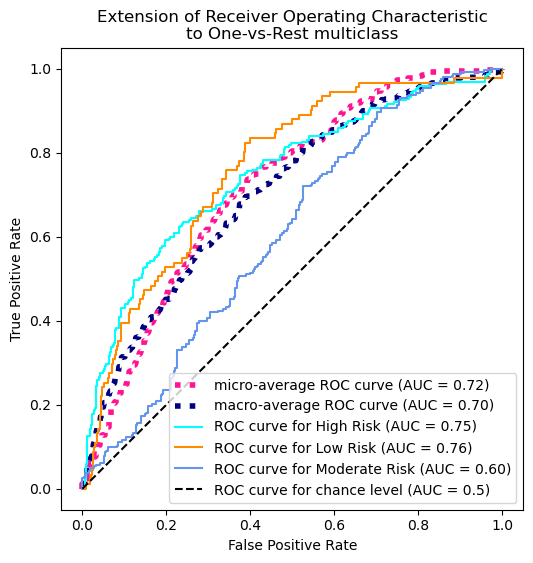

In [63]:
#MNB Scores
print(classification_report(y_test, y_pred_mnb))

from sklearn.metrics import RocCurveDisplay
y_score = mnb.predict_proba(X_test_scaled)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle
target_names = ['High Risk', 'Low Risk', 'Moderate Risk']

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


               precision    recall  f1-score   support

    High Risk       0.76      0.66      0.71       225
     Low Risk       0.49      0.55      0.52        91
Moderate Risk       0.59      0.63      0.61       243

     accuracy                           0.63       559
    macro avg       0.61      0.61      0.61       559
 weighted avg       0.64      0.63      0.63       559



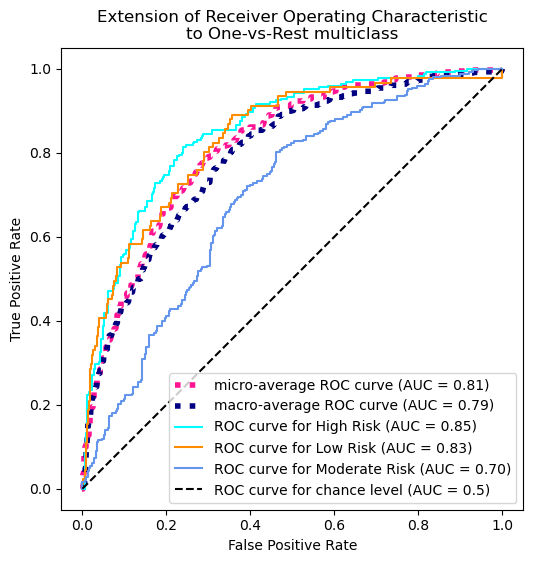

In [64]:
#GNB Scores
print(classification_report(y_test, y_pred_gnb))

from sklearn.metrics import RocCurveDisplay
y_score = gnb.predict_proba(X_test_scaled)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle
target_names = ['High Risk', 'Low Risk', 'Moderate Risk']

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


               precision    recall  f1-score   support

    High Risk       0.00      0.00      0.00       225
     Low Risk       0.00      0.00      0.00        91
Moderate Risk       0.43      1.00      0.61       243

     accuracy                           0.43       559
    macro avg       0.14      0.33      0.20       559
 weighted avg       0.19      0.43      0.26       559



/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

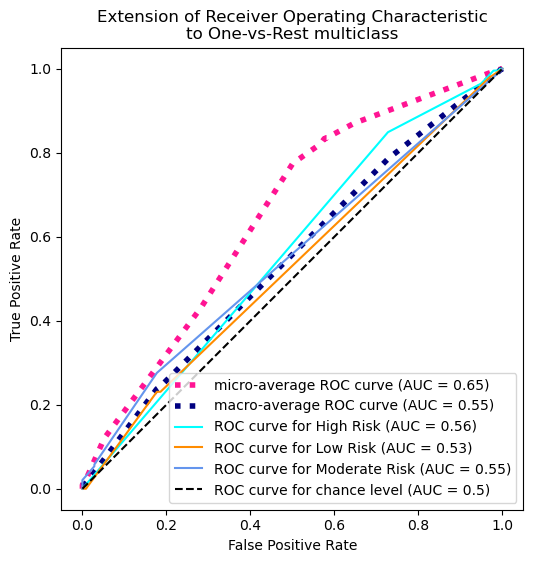

In [65]:
#BNB Scores
print(classification_report(y_test, y_pred_bnb))

from sklearn.metrics import RocCurveDisplay
y_score = bnb.predict_proba(X_test_scaled)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle
target_names = ['High Risk', 'Low Risk', 'Moderate Risk']

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


               precision    recall  f1-score   support

    High Risk       0.61      0.60      0.60       225
     Low Risk       0.38      0.36      0.37        91
Moderate Risk       0.48      0.49      0.49       243

     accuracy                           0.52       559
    macro avg       0.49      0.49      0.49       559
 weighted avg       0.51      0.52      0.51       559



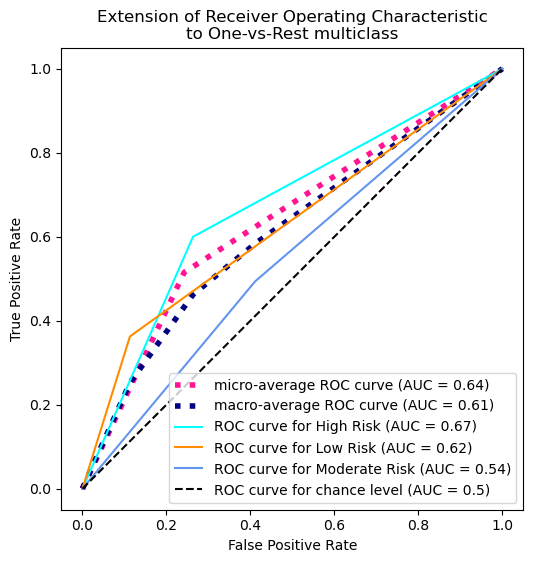

In [66]:
#DTC Scores
print(classification_report(y_test, y_pred_dtc))

from sklearn.metrics import RocCurveDisplay
y_score = dtc.predict_proba(X_test_scaled)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle
target_names = ['High Risk', 'Low Risk', 'Moderate Risk']

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


               precision    recall  f1-score   support

    High Risk       0.71      0.76      0.73       225
     Low Risk       0.65      0.29      0.40        91
Moderate Risk       0.60      0.69      0.64       243

     accuracy                           0.65       559
    macro avg       0.65      0.58      0.59       559
 weighted avg       0.65      0.65      0.64       559



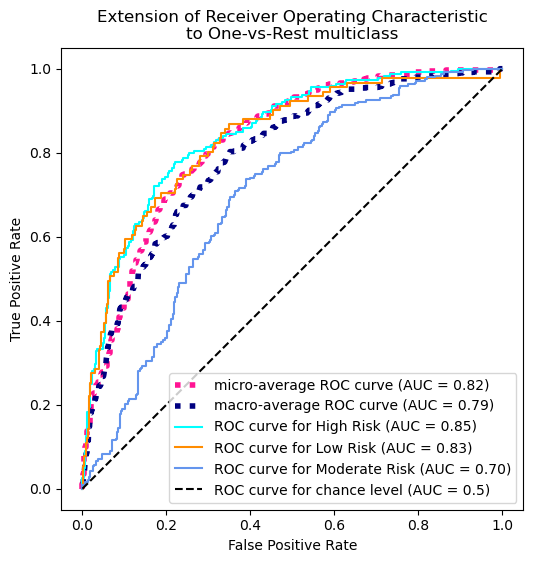

In [67]:
#MLP Scores
print(classification_report(y_test, y_pred_mlp))

from sklearn.metrics import RocCurveDisplay
y_score = mlp.predict_proba(X_test_scaled)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle
target_names = ['High Risk', 'Low Risk', 'Moderate Risk']

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


**5.c)**

In [68]:
# Create Decision MLP classifier
mlp = MLPClassifier()
mlp = mlp.fit(X_train_scaled,y_train)
mlp.score(X_test_scaled, y_test)

0.6565295169946332

In [69]:
# Create Decision MLP classifier
mlp = MLPClassifier()
mlp = mlp.fit(X_train_stdscaled,y_train)
mlp.score(X_test_stdscaled, y_test)

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6457960644007156

In [70]:
# Create Decision MLP classifier
mlp = MLPClassifier()
mlp = mlp.fit(X_train,y_train)
mlp.score(X_test, y_test)

0.5974955277280859

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
101/100
102/100
103/100
104/100
105/100
106/100
107/100
108/100
109/100
110/100
111/100
112/100
113/100
114/100
115/100
116/100
117/100
118/100
119/100
120/100
121/100
122/100
123/100
124/100
125/100
126/100
127/100
128/100
129/100
130/100
131/100
132/100
133/100
134/100
135/100
136/100
137/100
138/100
139/

Text(0, 0.5, 'Mean Error')

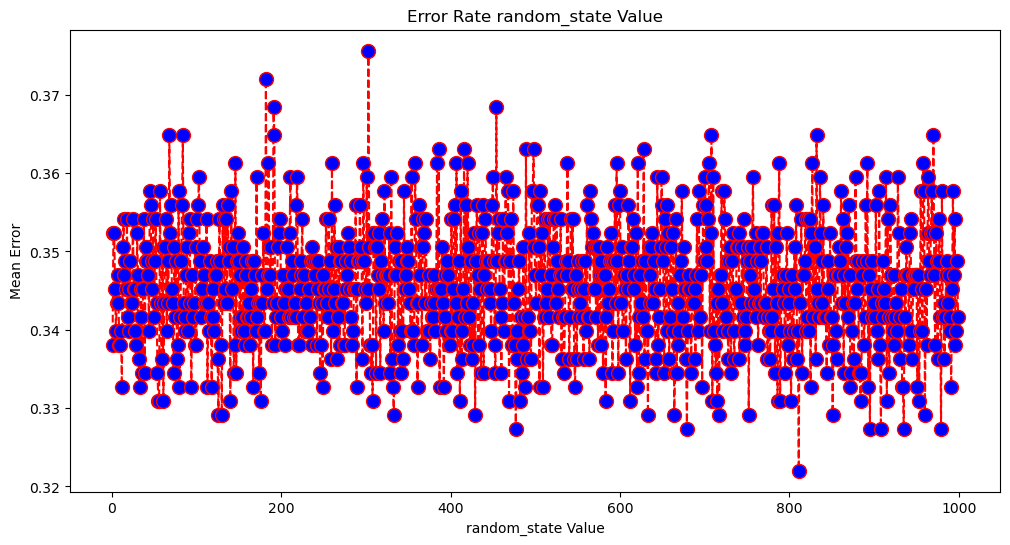

In [72]:
# Calculating error for random_state values between 1 and 1000
error = []

# Calculating error for random_state values between 1 and 1000
for i in range(1, 1000):
    print(str(i) + "/100")
    mlp_grid = MLPClassifier(random_state=i,max_iter=1000)
    mlp_grid.fit(X_train_scaled, y_train)
    pred_i = mlp_grid.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 1000), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate random_state Value')
plt.xlabel('random_state Value')
plt.ylabel('Mean Error')

800/100
801/100
802/100
803/100
804/100
805/100
806/100
807/100
808/100
809/100
810/100
811/100
812/100
813/100
814/100
815/100
816/100
817/100
818/100
819/100
820/100
821/100
822/100
823/100
824/100
825/100
826/100
827/100
828/100
829/100
830/100
831/100
832/100
833/100
834/100
835/100
836/100
837/100
838/100
839/100
840/100
841/100
842/100
843/100
844/100
845/100
846/100
847/100
848/100
849/100


Text(0, 0.5, 'Mean Error')

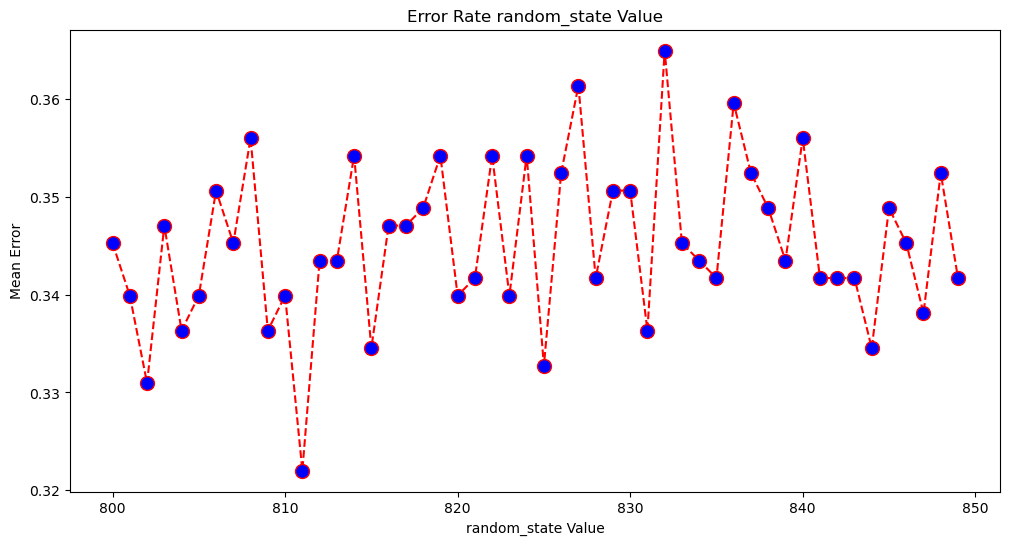

In [73]:
# Calculating error for random_state values between 1 and 1000
error = []

# Calculating error for random_state values between 1 and 1000
for i in range(800,850):
    print(str(i) + "/100")
    mlp_grid = MLPClassifier(random_state=i,max_iter=1000)
    mlp_grid.fit(X_train_scaled, y_train)
    pred_i = mlp_grid.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(800, 850), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate random_state Value')
plt.xlabel('random_state Value')
plt.ylabel('Mean Error')

In [77]:
# Create Decision MLP classifier
mlp = MLPClassifier(random_state=811,max_iter=1000)
mlp = mlp.fit(X_train_scaled,y_train)
mlp.score(X_test_scaled, y_test)

0.6779964221824687

In [80]:
mlp_grid = MLPClassifier(random_state=811,max_iter=1000)

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
         }

mlp_grid = GridSearchCV(mlp_grid, param_grid=params, cv=10)

mlp_grid.fit(X_train_scaled, y_train)

print('Best Score:', mlp_grid.best_score_, 'Best Parameters:', mlp_grid.best_params_)

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarni

Best Score: 0.6197549647661755 Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
params = {'hidden_layer_sizes': [(10,30,10),(20,),(10,),(100,)],
          'activation': ['tanh', 'relu'],
          'solver': ['sgd', 'adam'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
         }

mlp_grid = GridSearchCV(MLPClassifier(random_state=216, max_iter=100), param_grid=params, n_jobs=-1, cv=3)
mlp_grid.fit(X_train_scaled,y_train)

print('Train Accuracy : %.3f'%mlp_grid.best_estimator_.score(X_train_scaled, y_train))
print('Test Accuracy : %.3f'%mlp_grid.best_estimator_.score(X_test_scaled, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_grid.best_score_)
print('Best Parameters : ',mlp_grid.best_params_)

In [96]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('Risk_Level ~ BMI+DIASTOLIC_BLOOD_PRESSURE_mmHg+SYSTOLIC_BLOOD_PRESSURE_mmHg+WALK_DURATION_PER_DAY_MINUTES+COMPUTER_USE_TIME_PER_DAY_HOURS+CIGARETTES_CONSUMED_PER_DAY', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)

                          variable         VIF
0                        Intercept  131.961571
1                              BMI    1.040156
2    DIASTOLIC_BLOOD_PRESSURE_mmHg    1.548098
3     SYSTOLIC_BLOOD_PRESSURE_mmHg    1.529229
4    WALK_DURATION_PER_DAY_MINUTES    1.004902
5  COMPUTER_USE_TIME_PER_DAY_HOURS    1.006173
6      CIGARETTES_CONSUMED_PER_DAY    1.001294


In [ ]:
0   AGE_years                        2792 non-null   object 
 1   BMI                              2792 non-null   int64  
 2   HEIGHT_cm                        2792 non-null   float64
 3   WEIGHT_kg                        2792 non-null   float64
 4   WAIST_CIRCUMFERENCE_cm           2792 non-null   int64  
 5   DIASTOLIC_BLOOD_PRESSURE_mmHg    2792 non-null   int64  
 6   SYSTOLIC_BLOOD_PRESSURE_mmHg     2792 non-null   float64
 7   WALK_DURATION_PER_DAY_MINUTES    2792 non-null   int64  
 8   COMPUTER_USE_TIME_PER_DAY_HOURS  2792 non-null   int64  
 9   SMOKING_STATUS                   2792 non-null   float64
 10  CIGARETTES_CONSUMED_PER_DAY      2792 non-null   float64